In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # staviti -1 za CPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# import the needed libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# config
img_width, img_height = 28,28 #width & height of input image
input_depth = 1 #1: gray image

train_data_dir = 'TrainingSamoBel' #data training path

epochs = 20 #number of training epoch
batch_size = 10 #training batch size


list=[]
import os, shutil
for item in os.listdir(train_data_dir):
    s = os.path.join(train_data_dir, item)
    list.append(item)


# define image generator for Keras,
# here, we map pixel intensity to 0-1
train_datagen = ImageDataGenerator(rescale=1/255)


# read image batch by batch
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',#inpput iameg: gray
    target_size=(img_width,img_height),#input image size
    batch_size=batch_size,#batch size
    class_mode='categorical')#categorical: one-hot encoding format class label

Found 2607 images belonging to 8 classes.


In [4]:
testing_data_dir = 'Test/TestBel' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 474 images belonging to 8 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


2023-06-01 15:28:27.700291: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-01 15:28:27.700355: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: server-2x-2080Ti
2023-06-01 15:28:27.700361: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: server-2x-2080Ti
2023-06-01 15:28:27.700515: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.161.3
2023-06-01 15:28:27.700550: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.161.3
2023-06-01 15:28:27.700555: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.161.3
2023-06-01 15:28:27.703068: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following C

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                      

In [6]:
#Bel+Bel
import matplotlib.pyplot as plt
BelBel = model.fit_generator(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    #steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=25,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size)
    )

Epoch 1/25


/tmp/ipykernel_3227982/2088212913.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  BelBel = model.fit_generator(


261/261 [==============================] - 7s 22ms/step - loss: 0.3666 - accuracy: 0.9053 - val_loss: 2.8476 - val_accuracy: 0.3043
Epoch 2/25
261/261 [==============================] - 6s 21ms/step - loss: 0.0695 - accuracy: 0.9816 - val_loss: 0.1010 - val_accuracy: 0.9660
Epoch 3/25
261/261 [==============================] - 6s 22ms/step - loss: 0.0219 - accuracy: 0.9962 - val_loss: 0.0405 - val_accuracy: 0.9894
Epoch 4/25
261/261 [==============================] - 5s 20ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0592 - val_accuracy: 0.9830
Epoch 5/25
261/261 [==============================] - 5s 20ms/step - loss: 0.0540 - accuracy: 0.9870 - val_loss: 0.3119 - val_accuracy: 0.9532
Epoch 6/25
261/261 [==============================] - 5s 20ms/step - loss: 0.1171 - accuracy: 0.9743 - val_loss: 0.1728 - val_accuracy: 0.9638
Epoch 7/25
261/261 [==============================] - 6s 21ms/step - loss: 0.0215 - accuracy: 0.9950 - val_loss: 0.0635 - val_accuracy: 0.9766
Epoch 8/25

In [7]:
best_val_accuracy_Bel = max(BelBel.history['val_accuracy'])
print('val: ', best_val_accuracy_Bel)


test_loss_bel, test_accuracy_bel = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_bel)
print("Test Accuracy:", test_accuracy_bel)

val:  0.9957447052001953
48/48 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.9958
Test Loss: 0.008441593497991562
Test Accuracy: 0.9957805871963501


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


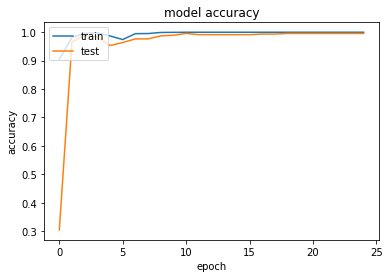

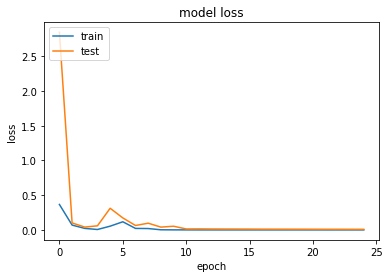

In [8]:
#Bel+Bel
# list all data in history
print(BelBel.history.keys())
# summarize history for accuracy
plt.plot(BelBel.history['accuracy'])
plt.plot(BelBel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(BelBel.history['loss'])
plt.plot(BelBel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
testing_data_dir = 'Test/TestGer' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Found 2928 images belonging to 8 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_8 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)        

Epoch 1/25


/tmp/ipykernel_3227982/744381621.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  BelGer = model.fit_generator(


261/261 [==============================] - 8s 27ms/step - loss: 0.3316 - accuracy: 0.9125 - val_loss: 3.3542 - val_accuracy: 0.3534
Epoch 2/25
261/261 [==============================] - 7s 26ms/step - loss: 0.0697 - accuracy: 0.9801 - val_loss: 2.0803 - val_accuracy: 0.6079
Epoch 3/25
261/261 [==============================] - 7s 26ms/step - loss: 0.0745 - accuracy: 0.9808 - val_loss: 2.2526 - val_accuracy: 0.5894
Epoch 4/25
261/261 [==============================] - 8s 29ms/step - loss: 0.0209 - accuracy: 0.9946 - val_loss: 1.2025 - val_accuracy: 0.7726
Epoch 5/25
261/261 [==============================] - 7s 27ms/step - loss: 8.0620e-04 - accuracy: 1.0000 - val_loss: 1.0350 - val_accuracy: 0.7997
Epoch 6/25
261/261 [==============================] - 8s 29ms/step - loss: 1.1541e-04 - accuracy: 1.0000 - val_loss: 0.9589 - val_accuracy: 0.8171
Epoch 7/25
261/261 [==============================] - 7s 26ms/step - loss: 4.9854e-05 - accuracy: 1.0000 - val_loss: 0.9700 - val_accuracy: 0.817

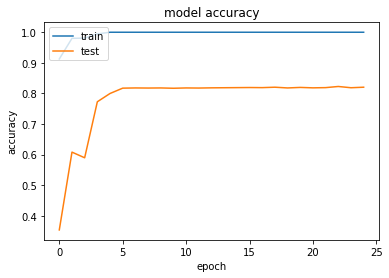

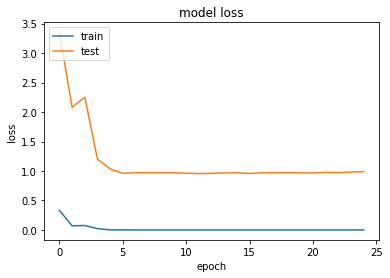

In [10]:
#Bel+Ger
import matplotlib.pyplot as plt
BelGer = model.fit_generator(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    #steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=25,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size)
    )

best_val_accuracy_Ger = max(BelGer.history['val_accuracy'])
print('val: ', best_val_accuracy_Ger)


test_loss_ger, test_accuracy_ger = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_ger)
print("Test Accuracy:", test_accuracy_ger)

#Gel+Ger
# list all data in history
print(BelGer.history.keys())
# summarize history for accuracy
plt.plot(BelGer.history['accuracy'])
plt.plot(BelGer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(BelGer.history['loss'])
plt.plot(BelGer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
testing_data_dir = 'Test/TestFra' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Found 122 images belonging to 8 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_14 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)         

Epoch 1/25


/tmp/ipykernel_3227982/3433046655.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  BelFra = model.fit_generator(


261/261 [==============================] - 6s 20ms/step - loss: 0.3128 - accuracy: 0.9114 - val_loss: 3.9571 - val_accuracy: 0.1000
Epoch 2/25
261/261 [==============================] - 5s 19ms/step - loss: 0.0880 - accuracy: 0.9735 - val_loss: 1.7901 - val_accuracy: 0.5667
Epoch 3/25
261/261 [==============================] - 5s 18ms/step - loss: 0.0422 - accuracy: 0.9862 - val_loss: 3.7365 - val_accuracy: 0.5417
Epoch 4/25
261/261 [==============================] - 5s 18ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 1.5526 - val_accuracy: 0.6833
Epoch 5/25
261/261 [==============================] - 5s 18ms/step - loss: 0.0397 - accuracy: 0.9900 - val_loss: 1.9769 - val_accuracy: 0.6500
Epoch 6/25
261/261 [==============================] - 5s 18ms/step - loss: 0.0398 - accuracy: 0.9900 - val_loss: 1.5921 - val_accuracy: 0.6500
Epoch 7/25
261/261 [==============================] - 5s 18ms/step - loss: 0.0539 - accuracy: 0.9835 - val_loss: 1.9849 - val_accuracy: 0.6917
Epoch 8/25

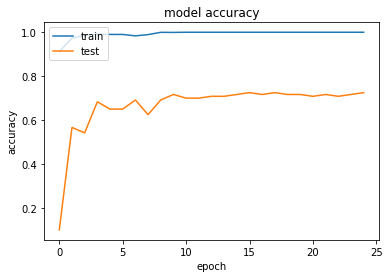

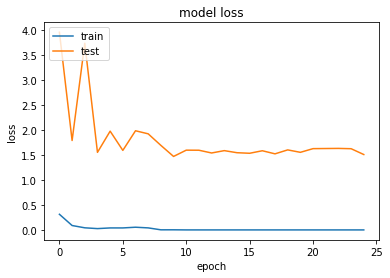

In [12]:
#Bel+Fra
import matplotlib.pyplot as plt
BelFra = model.fit_generator(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    #steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=25,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size)
    )

best_val_accuracy_Fra = max(BelFra.history['val_accuracy'])
print('val: ', best_val_accuracy_Fra)


test_loss_fra, test_accuracy_fra = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_fra)
print("Test Accuracy:", test_accuracy_fra)

#Bel+Fra
# list all data in history
print(BelFra.history.keys())
# summarize history for accuracy
plt.plot(BelFra.history['accuracy'])
plt.plot(BelFra.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(BelFra.history['loss'])
plt.plot(BelFra.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
testing_data_dir = 'Test/TestCro' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()

Found 634 images belonging to 8 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_21 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_22 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)         

Epoch 1/25
  1/261 [..............................] - ETA: 17s - loss: 0.1576 - accuracy: 1.0000

/tmp/ipykernel_3227982/3799238185.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  BelCro = model.fit_generator(


261/261 [==============================] - 6s 21ms/step - loss: 0.1135 - accuracy: 0.9643 - val_loss: 2.0368 - val_accuracy: 0.4667
Epoch 2/25
261/261 [==============================] - 5s 20ms/step - loss: 0.0512 - accuracy: 0.9847 - val_loss: 1.2510 - val_accuracy: 0.7476
Epoch 3/25
261/261 [==============================] - 6s 21ms/step - loss: 0.0443 - accuracy: 0.9866 - val_loss: 1.4086 - val_accuracy: 0.7159
Epoch 4/25
261/261 [==============================] - 5s 21ms/step - loss: 0.0327 - accuracy: 0.9927 - val_loss: 1.1664 - val_accuracy: 0.8048
Epoch 5/25
261/261 [==============================] - 5s 19ms/step - loss: 0.0149 - accuracy: 0.9965 - val_loss: 1.1623 - val_accuracy: 0.7841
Epoch 6/25
261/261 [==============================] - 5s 21ms/step - loss: 0.0162 - accuracy: 0.9962 - val_loss: 1.6359 - val_accuracy: 0.7762
Epoch 7/25
261/261 [==============================] - 5s 20ms/step - loss: 0.0395 - accuracy: 0.9881 - val_loss: 0.9347 - val_accuracy: 0.8190
Epoch 8/25

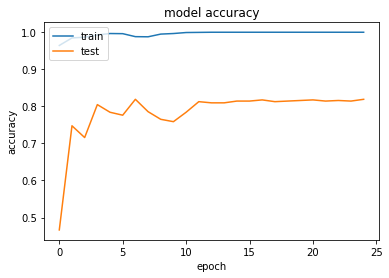

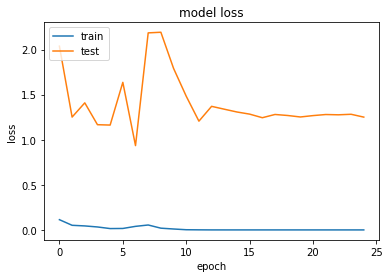

In [15]:
#Bel+Cro
import matplotlib.pyplot as plt
BelCro = model.fit_generator(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    #steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=25,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size)
    )

best_val_accuracy_Cro = max(BelCro.history['val_accuracy'])
print('val: ', best_val_accuracy_Cro)


test_loss_cro, test_accuracy_cro = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_cro)
print("Test Accuracy:", test_accuracy_cro)

#Bel+Cro
# list all data in history
print(BelCro.history.keys())
# summarize history for accuracy
plt.plot(BelCro.history['accuracy'])
plt.plot(BelCro.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(BelCro.history['loss'])
plt.plot(BelCro.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
testing_data_dir = 'Test/TestSwe' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Found 498 images belonging to 8 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_28 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_29 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)        

Epoch 1/25
  4/261 [..............................] - ETA: 4s - loss: 0.2653 - accuracy: 0.8750

/tmp/ipykernel_3227982/3119247033.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  BelSwe = model.fit_generator(


261/261 [==============================] - 6s 22ms/step - loss: 0.1475 - accuracy: 0.9551 - val_loss: 1.3971 - val_accuracy: 0.6204
Epoch 2/25
261/261 [==============================] - 5s 20ms/step - loss: 0.0653 - accuracy: 0.9847 - val_loss: 1.1789 - val_accuracy: 0.6490
Epoch 3/25
261/261 [==============================] - 5s 20ms/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.8988 - val_accuracy: 0.8327
Epoch 4/25
261/261 [==============================] - 5s 20ms/step - loss: 0.0274 - accuracy: 0.9908 - val_loss: 0.8395 - val_accuracy: 0.8020
Epoch 5/25
261/261 [==============================] - 5s 19ms/step - loss: 0.0427 - accuracy: 0.9893 - val_loss: 1.3019 - val_accuracy: 0.6714
Epoch 6/25
261/261 [==============================] - 6s 21ms/step - loss: 0.0572 - accuracy: 0.9866 - val_loss: 2.0490 - val_accuracy: 0.7061
Epoch 7/25
261/261 [==============================] - 5s 20ms/step - loss: 0.0149 - accuracy: 0.9965 - val_loss: 1.8575 - val_accuracy: 0.7041
Epoch 8/25

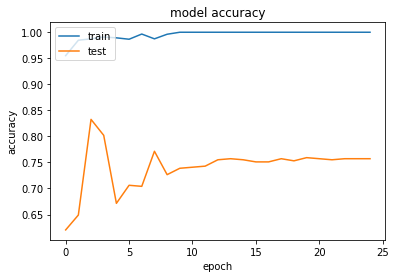

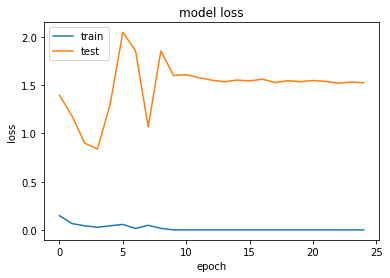

In [18]:
#Bel + Swe
import matplotlib.pyplot as plt
BelSwe = model.fit_generator(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    #steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=25,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size)
    )

best_val_accuracy_Swe = max(BelSwe.history['val_accuracy'])
print('val: ', best_val_accuracy_Swe)


test_loss_swe, test_accuracy_swe = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_swe)
print("Test Accuracy:", test_accuracy_swe)

#Bel+Swe
# list all data in history
print(BelSwe.history.keys())
# summarize history for accuracy
plt.plot(BelSwe.history['accuracy'])
plt.plot(BelSwe.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(BelSwe.history['loss'])
plt.plot(BelSwe.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
import pandas as pd

best_results = []


best_results.append({'Training Belgija': 'Bel', 'Best Val_Accuracy': best_val_accuracy_Bel, 'Best Test Accuracy':test_accuracy_bel})
best_results.append({'Training Belgija': 'Ger', 'Best Val_Accuracy': best_val_accuracy_Ger, 'Best Test Accuracy':test_accuracy_ger})
best_results.append({'Training Belgija': 'Swe', 'Best Val_Accuracy': best_val_accuracy_Swe, 'Best Test Accuracy':test_accuracy_swe})
best_results.append({'Training Belgija': 'Cro', 'Best Val_Accuracy': best_val_accuracy_Cro, 'Best Test Accuracy':test_accuracy_cro})
best_results.append({'Training Belgija': 'Fra', 'Best Val_Accuracy': best_val_accuracy_Fra, 'Best Test Accuracy':test_accuracy_fra})
df = pd.DataFrame(best_results)
print(df)  

  Training Belgija  Best Val_Accuracy  Best Test Accuracy
0              Bel           0.995745            0.993671
1              Ger           0.793836            0.793716
2              Swe           0.730612            0.732932
3              Cro           0.806349            0.802839
4              Fra           0.725000            0.713115


In [19]:
#Dodane slike u Training
import pandas as pd

best_results = []


best_results.append({'Training Belgija': 'Bel', 'Best Val_Accuracy': best_val_accuracy_Bel, 'Best Test Accuracy':test_accuracy_bel})
best_results.append({'Training Belgija': 'Ger', 'Best Val_Accuracy': best_val_accuracy_Ger, 'Best Test Accuracy':test_accuracy_ger})
best_results.append({'Training Belgija': 'Swe', 'Best Val_Accuracy': best_val_accuracy_Swe, 'Best Test Accuracy':test_accuracy_swe})
best_results.append({'Training Belgija': 'Cro', 'Best Val_Accuracy': best_val_accuracy_Cro, 'Best Test Accuracy':test_accuracy_cro})
best_results.append({'Training Belgija': 'Fra', 'Best Val_Accuracy': best_val_accuracy_Fra, 'Best Test Accuracy':test_accuracy_fra})
df = pd.DataFrame(best_results)
print(df) 

  Training Belgija  Best Val_Accuracy  Best Test Accuracy
0              Bel           0.995745            0.995781
1              Ger           0.822603            0.820697
2              Swe           0.832653            0.757028
3              Cro           0.819048            0.817035
4              Fra           0.725000            0.721311


In [2]:
#dodavanje slika u trening skup
import cv2
import os

folder_path = 'TrainingSamoBel'
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith(".ppm"):
            file_path = os.path.join(root, filename)
            image = cv2.imread(file_path)

            # Izokretanje slike
            flipped_image = cv2.flip(image, 1)  # 1 označava izokretanje horizontalno

            # Rotacija slike
            rotation_angle = 30
            rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), rotation_angle, 1)
            rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

            # Spremanje izokrenutih i rotiranih slika u isti direktorij
            cv2.imwrite(os.path.join(root, "flipped_" + filename), flipped_image)
            cv2.imwrite(os.path.join(root, "rotated_" + filename), rotated_image)